In [13]:
import numpy as np
#import cupy as cpy gpu support
import matplotlib.pyplot as plt
import yfinance as yf

0.003034717965759778
0.0005846574288441085
[141.93928528 141.94340122 141.94826268 141.95187731 141.9509404
 141.94654193 141.95146008 141.94993551 141.95400253 141.94825037
 141.94960668 141.96045737 141.96614433 141.96918225 141.97438844
 141.97284757 141.96144182 141.95857516 141.95252202 141.94412619
 141.94140813 141.94485072 141.94457149 141.94732186 141.94021268
 141.94596808 141.94844162 141.96350573 141.97044996 141.9768081
 141.97865118 141.98590343 141.98186476 141.98575078 141.98465524
 141.97799722 141.98356829 141.9877567  141.9956186  142.0016596
 142.00440914 141.99898768 141.99605299 141.99827153 141.99808637
 142.00437773 142.00040558 142.00612562 142.01251826 142.00787626
 142.01330276 142.01381093 142.02409094 142.02775099 142.02108572
 142.02170009 142.02308094 142.01717638 142.02088387 142.02188546
 142.01799644 142.01376858 142.01456328 142.01403278 142.01688523
 142.02110494 142.02383633 142.03018773 142.02393376 142.02603847
 142.02055786 142.02076121 142.01872

<function matplotlib.pyplot.show(close=None, block=None)>

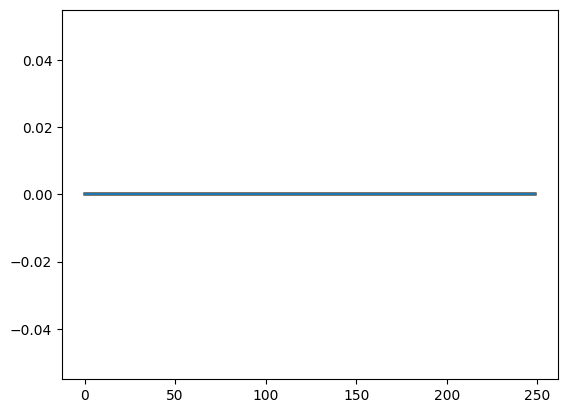

In [20]:
#Get apple stock price
ticker_appl = "NVDA"
ticker = yf.Ticker(ticker_appl)
hist_data = ticker.history("1y")
hist_closing = np.array(hist_data["Close"])

#Time Step and length of our simulation
time_step = len(hist_closing) -1
T = 1
dt = T / time_step

dW = np.random.normal(0, 1, size=time_step)

delta_t = np.diff(hist_closing)
log_St = np.log10(hist_closing)

log_Stdt_St = np.diff(log_St)

Z = log_Stdt_St / delta_t
mu = np.mean(Z)
sigma = np.std(Z)


print(mu)
print(sigma)

drift = (mu - (sigma /2)) * dt
diff = np.sqrt(sigma) * dW

gbm = np.zeros(time_step + 1)

def simulate_gbm(S0, mu, sigma, dt, steps): 
  dW = np.random.normal(0, np.sqrt(dt), size=time_step)
  gbm = np.zeros(time_step + 1)
  gbm[0] = S0

  for i in range(time_step):
    gbm[i+1] = gbm[i] * np.exp((mu - (sigma ** 2 / 2)) *  dt + (sigma * dW[i]))

  print(gbm)
  return gbm

paths = 100
S0 = hist_closing[0]

for  i in range(paths):
  gbm_path = simulate_gbm(S0, mu, sigma, dt,time_step )
  plt.plot(gbm)

plt.plot(gbm)
plt.show


In [ ]:
paths = 100
S0 = hist_closing[0]

for  i in range(paths):
    

_IncompleteInputError: incomplete input (3455808629.py, line 4)